In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GRU, LSTM
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
num_words = 10000
max_review_len = 100

### Загрузка данных

In [3]:
!wget https://www.dropbox.com/s/ufbhk3kadtnn6h0/yelp_review_polarity_csv.tgz?dl=1 -O yelp_review_polarity_csv.tgz

--2021-05-29 14:01:49--  https://www.dropbox.com/s/ufbhk3kadtnn6h0/yelp_review_polarity_csv.tgz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/ufbhk3kadtnn6h0/yelp_review_polarity_csv.tgz [following]
--2021-05-29 14:01:50--  https://www.dropbox.com/s/dl/ufbhk3kadtnn6h0/yelp_review_polarity_csv.tgz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucad5c3d1e48c21c9b4681cbb911.dl.dropboxusercontent.com/cd/0/get/BPbo5nJXyfr7yylPIsPxNlf6mM8B7tjCLMQOe5qECJn5F2IdshN8-whMOnu_ZJrzu3xrrOUVNf19rPfY90bK0Te_lK-qA8Iald88u58d1wju45tp_s6tatXvemnre98YFYApq6d0Rkt7ulAOww_0LThk/file?dl=1# [following]
--2021-05-29 14:01:50--  https://ucad5c3d1e48c21c9b4681cbb911.dl.dropboxusercontent.com/cd/0/get/BPbo5nJXyfr7yylPIsPxNlf6mM8B7tjCLMQOe5qE

In [4]:
!tar -xvf yelp_review_polarity_csv.tgz

yelp_review_polarity_csv/
yelp_review_polarity_csv/train.csv
yelp_review_polarity_csv/readme.txt
yelp_review_polarity_csv/test.csv


In [6]:
train = pd.read_csv('yelp_review_polarity_csv/train.csv', header=None, names=['Class', 'Review'])

In [7]:
reviews = train['Review']

In [8]:
reviews

0         Unfortunately, the frustration of being Dr. Go...
1         Been going to Dr. Goldberg for over 10 years. ...
2         I don't know what Dr. Goldberg was like before...
3         I'm writing this review to give you a heads up...
4         All the food is great here. But the best thing...
                                ...                        
559995    Ryan was as good as everyone on yelp has claim...
559996    Professional \nFriendly\nOn time AND affordabl...
559997    Phone calls always go to voicemail and message...
559998    Looks like all of the good reviews have gone t...
559999    Ryan Rocks! I called him this morning for some...
Name: Review, Length: 560000, dtype: object

In [9]:
y_train = train['Class'] - 1

In [10]:
y_train

0         0
1         1
2         0
3         0
4         1
         ..
559995    1
559996    1
559997    0
559998    0
559999    1
Name: Class, Length: 560000, dtype: int64

### Токенизация текста

In [11]:
 tokenizer = Tokenizer(num_words=num_words)

### Обучение токенизатора на тексте

In [12]:
tokenizer.fit_on_texts(reviews)

### Преобразование текста в числовое представление

In [14]:
sequences = tokenizer.texts_to_sequences(reviews)

### Приведение отзывов к одной длине

In [15]:
x_train = pad_sequences(sequences, maxlen=max_review_len)

### Создание последовательной модели

In [16]:
model = Sequential()
model.add(Embedding(num_words, 64, input_length=max_review_len))
#model.add(LSTM(64))
model.add(GRU(64))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 64)           640000    
_________________________________________________________________
gru (GRU)                    (None, 64)                24960     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 665,025
Trainable params: 665,025
Non-trainable params: 0
_________________________________________________________________


### Обучение сети

In [22]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

Epoch 1/5
3938/3938 [==============================] - 67s 15ms/step - loss: 0.2062 - accuracy: 0.9168 - val_loss: 0.1313 - val_accuracy: 0.9499
Epoch 2/5
3938/3938 [==============================] - 58s 15ms/step - loss: 0.1434 - accuracy: 0.9441 - val_loss: 0.1138 - val_accuracy: 0.9567
Epoch 3/5
3938/3938 [==============================] - 58s 15ms/step - loss: 0.1194 - accuracy: 0.9541 - val_loss: 0.1081 - val_accuracy: 0.9591
Epoch 4/5
3938/3938 [==============================] - 58s 15ms/step - loss: 0.1018 - accuracy: 0.9613 - val_loss: 0.1098 - val_accuracy: 0.9584
Epoch 5/5
3938/3938 [==============================] - 58s 15ms/step - loss: 0.0854 - accuracy: 0.9684 - val_loss: 0.1210 - val_accuracy: 0.9565


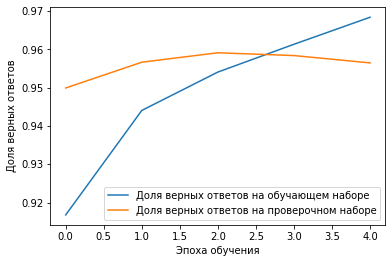

In [23]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [24]:
test = pd.read_csv('yelp_review_polarity_csv/test.csv', 
                    header=None, 
                    names=['Class', 'Review'])

In [25]:
test_sequences = tokenizer.texts_to_sequences(test['Review'])

In [26]:
x_test = pad_sequences(test_sequences, maxlen=max_review_len)

In [27]:
y_test = test['Class'] - 1

In [28]:
model.evaluate(x_test, y_test, verbose=1)

1188/1188 [==============================] - 4s 4ms/step - loss: 0.1484 - accuracy: 0.9452


[0.14837093651294708, 0.94523686170578]